# LSTM

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


# There is a warning as there is 1 extra column containing only 0 that does not have a header
df = pd.read_csv('../../data/stock_data.csv', index_col=False)
#df = df.iloc[:, :-1]
df = df[['open', 'high', 'low', 'close', 'volume']]
df.head()

C:\Users\Adwait\AppData\Local\Temp\ipykernel_15164\3308701499.py:10: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv('../../data/stock_data.csv', index_col=False)


,open,high,low,close,volume
0,1539.00,1557.00,1535.25,1551.35,2808451
1,1546.00,1549.15,1523.00,1534.40,5396313
2,1519.95,1519.95,1488.00,1490.00,7550363
3,1504.95,1519.75,1492.90,1512.70,7056038
4,1506.75,1539.70,1506.25,1532.55,8895403


In [21]:
df.describe()

,open,high,low,close,volume
count,344.000000,344.000000,344.000000,344.000000,3.440000e+02
mean,1700.974273,1717.697965,1684.221948,1701.007849,7.121167e+06
std,182.374727,183.973302,180.509961,182.052915,4.125552e+06
min,1352.000000,1405.900000,1307.000000,1393.650000,2.921530e+05
25%,1525.225000,1535.862500,1505.937500,1525.575000,4.614136e+06
50%,1685.500000,1699.875000,1670.175000,1686.600000,6.299770e+06
75%,1875.362500,1893.125000,1860.250000,1875.612500,8.386537e+06
max,1995.450000,2006.450000,1977.600000,1999.700000,3.711382e+07


## Convert to Normalized Value

In [22]:
# Normalize all features between 0 and 1
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Keep the original close prices for later inverse transform
close_scaler = MinMaxScaler()
close_scaler.fit(df[['close']])

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [24]:
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])               # 15-day window
        y.append(data[i+seq_length][3])              # 'close' is at index 3
    return np.array(x), np.array(y)

SEQ_LEN = 15
X, y = create_sequences(scaled_data, SEQ_LEN)

# Split into train and test
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [27]:
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(SEQ_LEN, 5)))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output: next day's close

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,251 (43.95 KB)

 Trainable params: 11,251 (43.95 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=20, batch_size=16)

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3621 - val_loss: 0.0679
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0358 - val_loss: 0.0078
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0165 - val_loss: 0.0170
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0151 - val_loss: 0.0103
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0154 - val_loss: 0.0143
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0165 - val_loss: 0.0074
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0155 - val_loss: 0.0146
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0120 - val_loss: 0.0096
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0113 - val_loss: 0.0087
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0099 - val_loss: 0.0089
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0099 - val_loss: 0.0068
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0

In [29]:
# Predict on test data
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred_inv = close_scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = close_scaler.inverse_transform(y_test.reshape(-1, 1))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


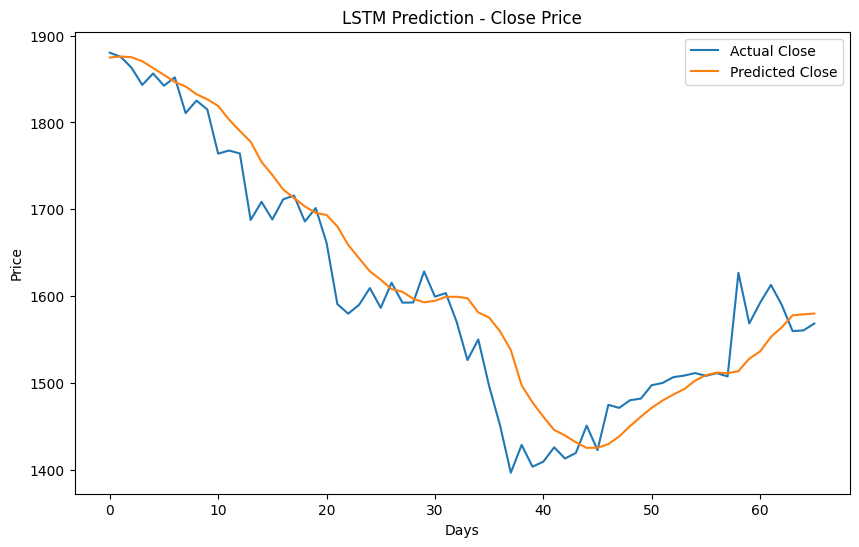

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual Close')
plt.plot(y_pred_inv, label='Predicted Close')
plt.title("LSTM Prediction - Close Price")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()